# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

> **Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001433 ([link](https://dandiarchive.org/dandiset/001433/0.250507.2356)), which contains behavioral and electrophysiological recordings from freely-behaving mice. The dataset includes:
- Local field potential (LFP) recordings from the olfactory bulb
- Breathing (sniffing) measurements
- No explicit stimuli or tasks

We will demonstrate how to:
1. Access the data using the DANDI API
2. Load and examine the NWB file structure
3. Visualize LFP and breathing signals
4. Analyze basic breathing patterns

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Get the URL for our example file
url = next(dandiset.get_assets_by_glob("sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb")).download_url

# Set up remote file access
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Data Structure Overview
The NWB file contains several key components:
- LFP recordings from 16 channels
- Raw sniffing signal
- Processed breathing events (inhalation and exhalation times)

## Examining LFP and Breathing Signals

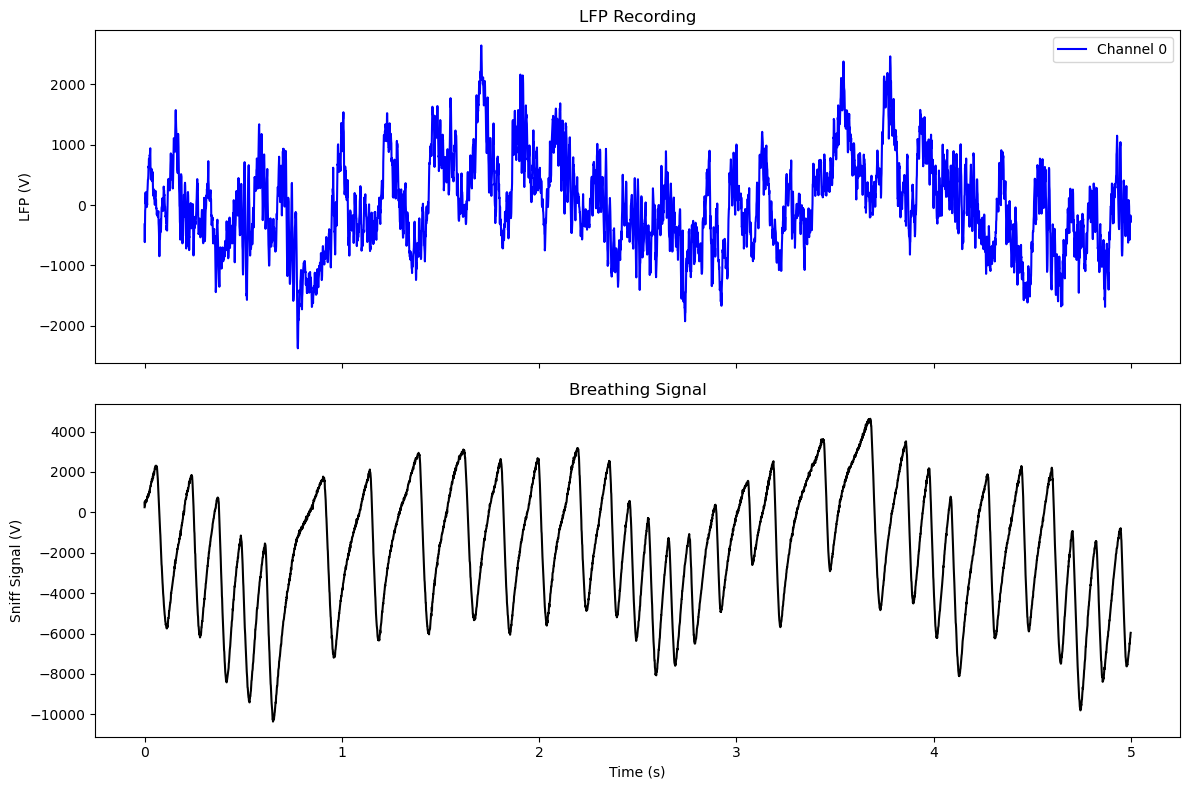

In [3]:
# Extract LFP and sniffing data
lfp_data = nwb.acquisition['LFP'].data
sniff_data = nwb.acquisition['SniffSignal'].data

# Plot a short segment (first 5 seconds) of data
sampling_rate = 1000  # Hz
time_window = 5  # seconds
samples = sampling_rate * time_window

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot LFP from first channel
time = np.arange(samples) / sampling_rate
ax1.plot(time, lfp_data[:samples, 0], 'b-', label='Channel 0')
ax1.set_ylabel('LFP (V)')
ax1.set_title('LFP Recording')
ax1.legend()

# Plot sniffing signal
ax2.plot(time, sniff_data[:samples], 'k-')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Sniff Signal (V)')
ax2.set_title('Breathing Signal')

plt.tight_layout()

## Analyzing Breathing Events

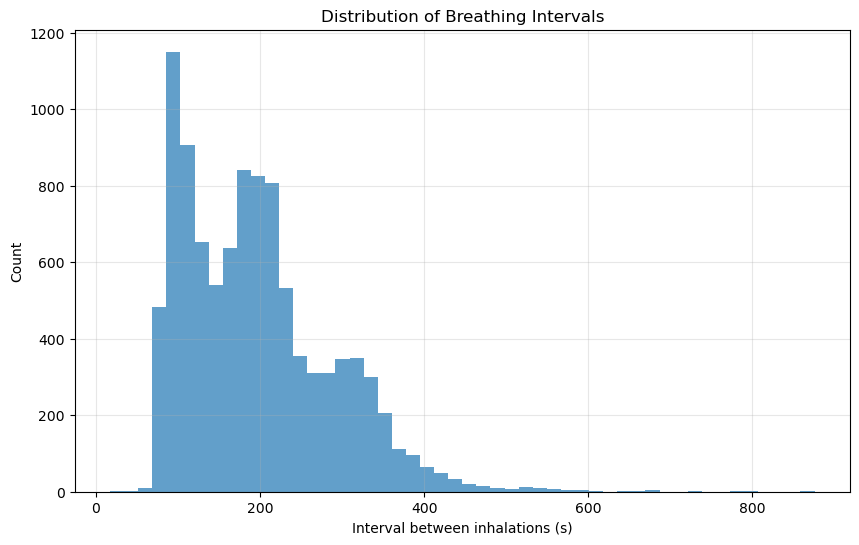

In [4]:
# Get inhalation and exhalation times
inhale_times = nwb.processing['behavior'].data_interfaces['inhalation_time'].timestamps
exhale_times = nwb.processing['behavior'].data_interfaces['exhalation_time'].timestamps

# Calculate breathing intervals
breath_intervals = np.diff(inhale_times)

# Plot histogram of breathing intervals
plt.figure(figsize=(10, 6))
plt.hist(breath_intervals, bins=50, alpha=0.7)
plt.xlabel('Interval between inhalations (s)')
plt.ylabel('Count')
plt.title('Distribution of Breathing Intervals')
plt.grid(True, alpha=0.3)

## Accessing Electrode Information

In [5]:
# Convert electrodes table to a more readable format
electrodes_df = nwb.electrodes.to_dataframe()
print("Number of electrodes:", len(electrodes_df))
print("\nElectrode locations:")
print(electrodes_df['location'].unique())
print("\nFiltering applied:")
print(electrodes_df['filtering'].unique())

Number of electrodes: 16

Electrode locations:
['olfactory bulb']

Filtering applied:
['none']


## Next Steps
This dataset enables various analyses:
1. Relationship between breathing patterns and LFP signals
2. Spatial organization of LFP activity across electrodes
3. Temporal structure of breathing rhythms

The code provided here can be adapted to:
- Analyze different time windows
- Examine other electrode channels
- Compute additional breathing metrics
- Investigate relationships between LFP and breathing patterns